# Data Challenge
This notebook performed funnel analysis for an e-commerce website. The analysis identified the conversion rates between different pages in different groups of users, e.g. desktop vs mobile users, male vs female users. The AdaBoost classifier is implemented to predict if a user will drop off or pay.

## Analysis Contents
  ### [1. Data Summary](#data_summary)
  ### [2. Merge Tables](#merge_tables)
  ### [3. Data Exploration](#data_exploration)
  ### [4. Machine Learning](#machine_learning)
  ### [5. Feature Analysis](#feature_analysis)
  ### [6. Summary](#summary)

<a id='data_summary'></a>
### 1. Data Summary

In [1]:
# import libraries for the analysis
import pandas as pd
# get data path
data_path = 'Funnel/'

In [2]:
def check_data(df, file_name):
    '''
    this function examine the loaded data
    '''
    print 'Summary for %s: \n'%(file_name)
    # examine the data
    print 'The head of the data: '
    print df.head()
    print 'The tail of the data: '
    print df.tail()
    # examine how many data points and columns in the dataset
    print 'There are %d rows and %d columns.'%(df.shape[0], df.shape[1])
    print 'Data types and number of data points in the dataset: '
    print df.info()
    print 'The number of duplicated user_id in the dataset: ', sum(df.duplicated('user_id'))

In [3]:
# I used a function to detect the missing and non-nummeric values
def detect_missing(df):
    '''
    this function is used to detect the missing or non numberic values
    '''
    for col in df.columns:
        print 'The number of missing values in column %s is %d' %(col, sum(pd.isnull(df[col])))

### 1.1 User Data
Load and check the user data

In [4]:
# read user data into the pandas dataframe, there is no header in the file, so the hearder parameter is set as None
user_data = pd.read_csv(data_path + 'user_table.csv')
# check user table data frame
check_data(user_data, 'user_table')
# examine missing values
detect_missing(user_data)

Summary for user_table: 

The head of the data: 
   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male
The tail of the data: 
       user_id        date   device     sex
90395   307667  2015-03-30  Desktop  Female
90396   642989  2015-02-08  Desktop  Female
90397   659645  2015-04-13  Desktop    Male
90398   359779  2015-03-23  Desktop    Male
90399   438929  2015-03-26   Mobile  Female
There are 90400 rows and 4 columns.
Data types and number of data points in the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None
The number of duplicated user_id in the 

### 1.2 Home Page Table
Load and check the home page table

In [5]:
# read home page data into the pandas dataframe, there is no header in the file, so the hearder parameter is set as None
home_page_data = pd.read_csv(data_path + 'home_page_table.csv')
# check home page table data frame
check_data(home_page_data, 'home_page_table')
# examine missing values
detect_missing(home_page_data)

Summary for home_page_table: 

The head of the data: 
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
The tail of the data: 
       user_id       page
90395   456851  home_page
90396   128619  home_page
90397   167290  home_page
90398   437765  home_page
90399   337840  home_page
There are 90400 rows and 2 columns.
Data types and number of data points in the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
None
The number of duplicated user_id in the dataset:  0
The number of missing values in column user_id is 0
The number of missing values in column page is 0


### 1.3 Search Page Table
Load and check the search page table

In [6]:
# read search page data into the pandas dataframe, there is no header in the file, so the hearder parameter is set as None
search_page_data = pd.read_csv(data_path + 'search_page_table.csv')
# check search page table data frame
check_data(search_page_data, 'search_page_table')
# examine missing values
detect_missing(search_page_data)

Summary for search_page_table: 

The head of the data: 
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
The tail of the data: 
       user_id         page
45195   417880  search_page
45196   989982  search_page
45197   428806  search_page
45198   609493  search_page
45199   303221  search_page
There are 45200 rows and 2 columns.
Data types and number of data points in the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
page       45200 non-null object
dtypes: int64(1), object(1)
memory usage: 706.3+ KB
None
The number of duplicated user_id in the dataset:  0
The number of missing values in column user_id is 0
The number of missing values in column page is 0


### 1.4 Payment Page Table
Load and check the payment page table

In [7]:
# read payment page data into the pandas dataframe, there is no header in the file, so the hearder parameter is set as None
payment_page_data = pd.read_csv(data_path + 'payment_page_table.csv')
# check payment page table data frame
check_data(payment_page_data, 'payment_page_table')
# examine missing values
detect_missing(payment_page_data)

Summary for payment_page_table: 

The head of the data: 
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page
The tail of the data: 
      user_id          page
6025    23639  payment_page
6026   659242  payment_page
6027   395342  payment_page
6028   637777  payment_page
6029   604008  payment_page
There are 6030 rows and 2 columns.
Data types and number of data points in the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB
None
The number of duplicated user_id in the dataset:  0
The number of missing values in column user_id is 0
The number of missing values in column page is 0


### 1.5 Payment Confirmation Table
Load and check the payment confirmation table

In [8]:
# read payment confirmation page data into the pandas dataframe, there is no header in the file, so the hearder parameter is set as None
payment_confirmation_data = pd.read_csv(data_path + 'payment_confirmation_table.csv')
# check payment confirmation table data frame
check_data(payment_confirmation_data, 'payment_confirmation_table')
# examine missing values
detect_missing(payment_confirmation_data)

Summary for payment_confirmation_table: 

The head of the data: 
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page
The tail of the data: 
     user_id                       page
447   397473  payment_confirmation_page
448   860829  payment_confirmation_page
449   371291  payment_confirmation_page
450   263707  payment_confirmation_page
451   892101  payment_confirmation_page
There are 452 rows and 2 columns.
Data types and number of data points in the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
user_id    452 non-null int64
page       452 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB
None
The number of duplicated user_id in the dataset:  0
The number of missing values in column user_id is 0
The number of missing values in 

#### In summary:
* there are total 90400 users visited the homepage
* 45200 users landed on the search page
* 6030 users get to payment page and 
* only 452 users end up payment confirmation page. 

There are no missing values and duplicated user_ids in all tables.

<a id='merge_tables'></a>
### 2. Merge Tables

In [9]:
# merge user data and page visiting data
merged_users = pd.merge(user_data, home_page_data, on = ['user_id'], how = 'left').merge\
                    (search_page_data, on = ['user_id'], how = 'left').merge\
                    (payment_page_data, on = ['user_id'], how = 'left').merge\
                    (payment_confirmation_data, on = ['user_id'], how = 'left')
merged_users.columns = ['user_id', 'date', 'device', 'sex', 'home_page', 'search_page', 
                        'payment_page', 'payment_confirmation']
# check merged data
check_data(merged_users, 'merged_users_table')
# examine missing values
detect_missing(merged_users)

Summary for merged_users_table: 

The head of the data: 
   user_id        date   device     sex  home_page  search_page payment_page  \
0   450007  2015-02-28  Desktop  Female  home_page          NaN          NaN   
1   756838  2015-01-13  Desktop    Male  home_page          NaN          NaN   
2   568983  2015-04-09  Desktop    Male  home_page  search_page          NaN   
3   190794  2015-02-18  Desktop  Female  home_page  search_page          NaN   
4   537909  2015-01-15  Desktop    Male  home_page          NaN          NaN   

  payment_confirmation  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
The tail of the data: 
       user_id        date   device     sex  home_page  search_page  \
90395   307667  2015-03-30  Desktop  Female  home_page          NaN   
90396   642989  2015-02-08  Desktop  Female  home_page  search_page   
90397   659645  2015-04-13  Desktop    Male  home_page  search_page   
90398

#### Data Transformation

* Extract year, month and date information from date column

In [10]:
def date_transformation(row):
    '''
    this function convert date into year, month and day
    '''
    date = row['date']
    return int(date[:4]), int(date[5:7]), int(date[8:])
merged_users['year'] = merged_users.apply(lambda row : date_transformation(row)[0], axis = 1)
merged_users['month'] = merged_users.apply(lambda row : date_transformation(row)[1], axis = 1)
merged_users['day'] = merged_users.apply(lambda row : date_transformation(row)[2], axis = 1)
merged_users.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation,year,month,day
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,2015,2,28
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,13
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,2015,4,9
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,2015,2,18
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,15


* Use 0 to indicate desktop and 1 to indicate mobile in device column

In [11]:
merged_users['device'] = merged_users['device'].apply(lambda x : 0 if x == 'Desktop' else 1)

* Use 0 to indicate female and 1 to indicate male in sex column

In [12]:
merged_users['sex'] = merged_users['sex'].apply(lambda x : 0 if x == 'Female' else 1)

* Use 0 to indicate drop off (NaN) and 1 to indicate stay for search page, payment page and payment confirmation page.

In [13]:
merged_users['home_page'] = merged_users['home_page'].apply(lambda x : 1. if x == 'home_page' else 0.)
merged_users['search_page'] = merged_users['search_page'].apply(lambda x : 1. if x == 'search_page' else 0.)
merged_users['payment_page'] = merged_users['payment_page'].apply(lambda x : 1. if x == 'payment_page' else 0.)
merged_users['payment_confirmation'] = merged_users['payment_confirmation'].apply(lambda x : 1. if x == 'payment_confirmation_page' else 0.)
merged_users.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation,year,month,day
0,450007,2015-02-28,0,0,1.0,0.0,0.0,0.0,2015,2,28
1,756838,2015-01-13,0,1,1.0,0.0,0.0,0.0,2015,1,13
2,568983,2015-04-09,0,1,1.0,1.0,0.0,0.0,2015,4,9
3,190794,2015-02-18,0,0,1.0,1.0,0.0,0.0,2015,2,18
4,537909,2015-01-15,0,1,1.0,0.0,0.0,0.0,2015,1,15


<a id='data_exploration'></a>
### 3. Data Exploration
This section is to find out the conversion rates between pages in the following categories:
* Home page to search page
* Search to payment page
* Payment page to payment confirmation page

In [14]:
def plot_conversion_rate(df, xlabel, title):
    '''
    generate conversion rate graphs from df
    '''
    df.plot(kind = 'barh')
    plt.xlabel(xlabel)
    plt.title(title)

In [15]:
def compute_conversion_rate(df, labels, cols = 'conversion rate', is_single = True):
    '''
    this function is used to calculate the conversion rate
    '''
    total_users_at_home_page = df['home_page'].sum()
    total_users_at_search_page = df['search_page'].sum()
    total_users_at_payment_page = df['payment_page'].sum()
    total_users_at_payment_confirmation = df['payment_confirmation'].sum()
    home_to_search = total_users_at_search_page*100/total_users_at_home_page
    home_to_payment = total_users_at_payment_page*100/total_users_at_home_page
    home_to_confirmation = total_users_at_payment_confirmation*100/total_users_at_home_page
    search_to_payment = total_users_at_payment_page*100/total_users_at_search_page
    search_to_confirmation = total_users_at_payment_confirmation*100/total_users_at_search_page
    payment_to_confirmation = total_users_at_payment_confirmation*100/total_users_at_payment_page
    y = [home_to_search, home_to_payment, home_to_confirmation, search_to_payment, 
             search_to_confirmation, payment_to_confirmation]
    s = {}
    if is_single:
        s = {cols:y}
    else:
        y = [rate.values for rate in y]
        for i in xrange(len(cols)):
            col = cols[i]
            values = [rate[i] for rate in y]
            s[col] = values
    df_rate = pd.DataFrame(s, index = labels)
    return df_rate

#### 3.1 Total Conversion Rate

                         conversion rate
home_to_search                 50.000000
home_to_payment                 6.670354
home_to_confirmation            0.500000
search_to_payment              13.340708
search_to_confirmation          1.000000
payment_to_confirmation         7.495854


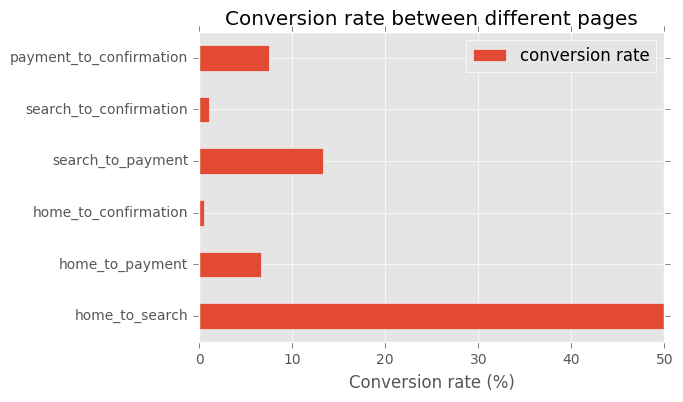

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline
matplotlib.style.use('ggplot')
labels = ['home_to_search', 'home_to_payment', 'home_to_confirmation', 'search_to_payment', 
     'search_to_confirmation', 'payment_to_confirmation']
df_rate = compute_conversion_rate(merged_users, labels, cols = 'conversion rate', is_single = True)
print df_rate
xlabel = 'Conversion rate (%)'
title = 'Conversion rate between different pages'
plot_conversion_rate(df_rate, xlabel, title)

#### Summary for total conversion rate:
* The conversion rate decreases from home to search, to payment and to confirmation.
* The conversion rate decreases from search to payment and to confirmation.

#### 3.2 Conversion Rate by Months

                                 1          2          3          4
home_to_search           59.973451  60.561947  39.287611  40.176991
home_to_payment          10.575221  10.672566   2.792035   2.641593
home_to_confirmation      0.836283   0.765487   0.194690   0.203540
search_to_payment        17.633171  17.622562   7.106656   6.574890
search_to_confirmation    1.394422   1.263973   0.495551   0.506608
payment_to_confirmation   7.907950   7.172471   6.973059   7.705193


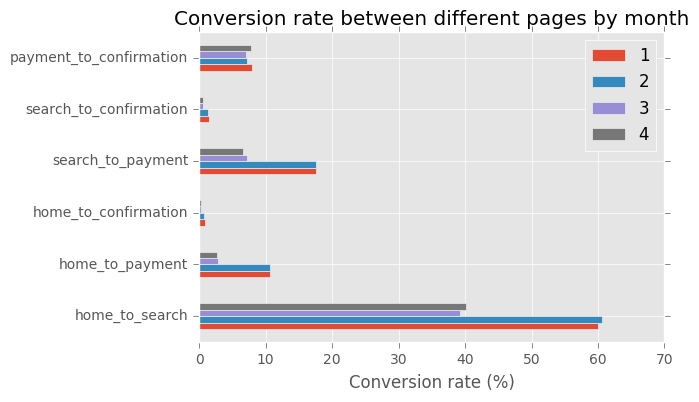

In [17]:
grouped_month_users = merged_users.groupby('month')
df_rate_month = compute_conversion_rate(grouped_month_users, labels, cols = [1,2,3,4], is_single = False)
print df_rate_month
xlabel = 'Conversion rate (%)'
title = 'Conversion rate between different pages by month'
plot_conversion_rate(df_rate_month, xlabel, title)

#### Summary for conversion rate by month:
* The conversion rates from payment page to payment confirmation page in different months are similar.
* There are higher conversion rates in Jan and Feb from home to search, to payment, to confirmation and from search to payment or to confirmation as compared to those conversion rates on March and April.

#### 3.3 Conversion Rate by Days

                                1          2          3          4   \
home_to_search           50.247443  49.606299  48.032520  50.958628   
home_to_payment           7.093369   6.627297   6.276423   7.029936   
home_to_confirmation      0.494886   0.492126   0.682927   0.605449   
search_to_payment        14.116875  13.359788  13.067028  13.795380   
search_to_confirmation    0.984898   0.992063   1.421801   1.188119   
payment_to_confirmation   6.976744   7.425743  10.880829   8.612440   

                                5          6          7          8   \
home_to_search           50.499002  50.378913  49.703557  49.284123   
home_to_payment           7.252162   5.897858   6.159420   6.649698   
home_to_confirmation      0.665336   0.658979   0.559947   0.413618   
search_to_payment        14.361001  11.706998  12.392313  13.492576   
search_to_confirmation    1.317523   1.308044   1.126574   0.839251   
payment_to_confirmation   9.174312  11.173184   9.090909   6.220096   

    

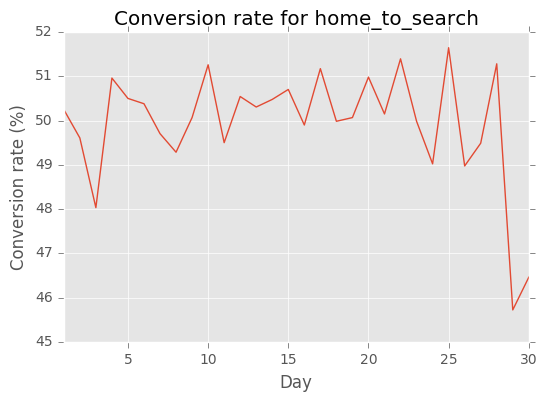

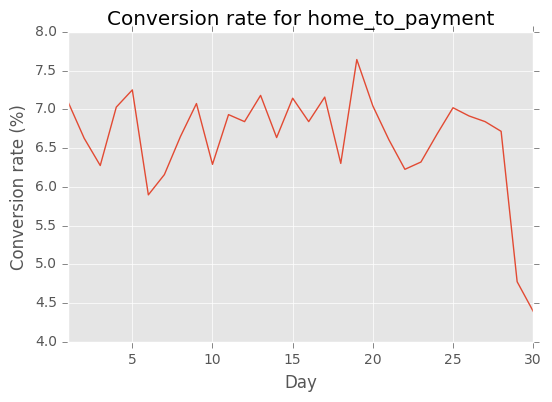

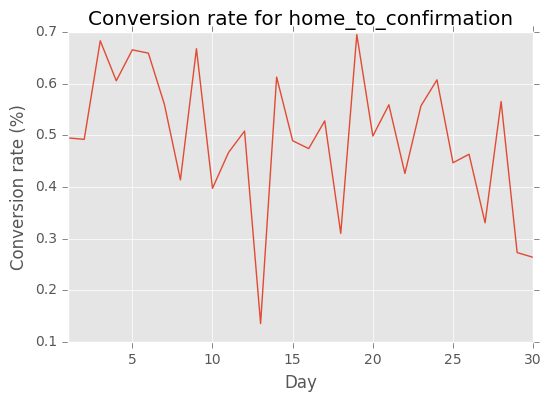

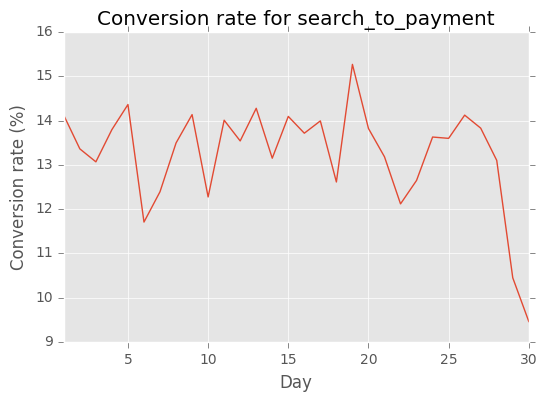

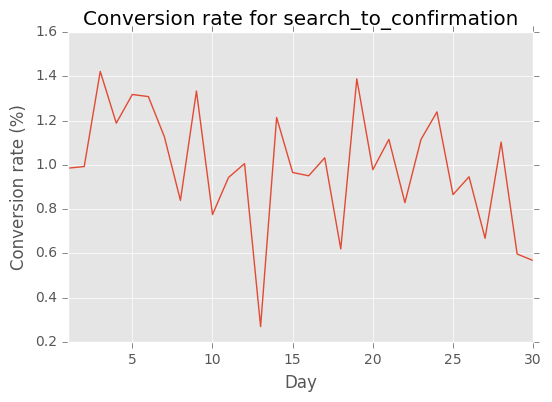

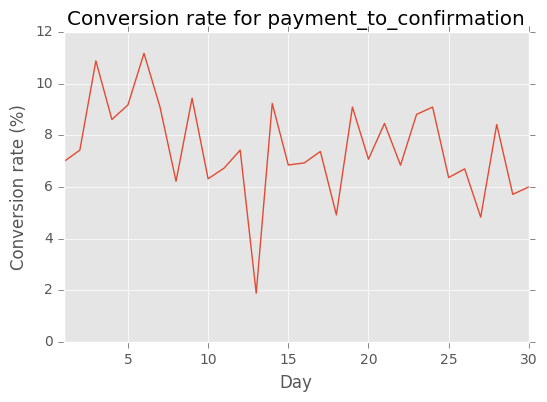

In [18]:
grouped_day_users = merged_users.groupby('day')
df_rate_day = compute_conversion_rate(grouped_day_users, labels, cols = range(1, 31), is_single = False)
print df_rate_day
title = 'Conversion rate between different pages by day'
#plot_conversion_rate(df_rate_day, xlabel, title)
for i in labels:
    fig = plt.subplots()
    df_rate_day.loc[i, :].plot(kind = 'line')
    plt.title('Conversion rate for ' + str(i))
    plt.xlabel('Day')
    plt.ylabel('Conversion rate (%)')

#### Summary for conversion rate by day:
* The conversion rates from home page to search page, to payment page and from search to payment page decreased at the end of month.
* Usually, the conversion rates are high at the beginning of the month.

#### 3.4 Conversion Rate by Device

                           Desktop  Mobile
home_to_search           50.000000    50.0
home_to_payment           5.000000    10.0
home_to_confirmation      0.249169     1.0
search_to_payment        10.000000    20.0
search_to_confirmation    0.498339     2.0
payment_to_confirmation   4.983389    10.0


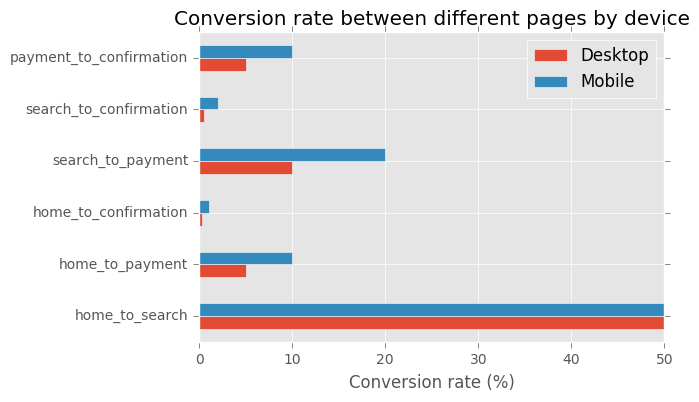

In [19]:
grouped_device_users = merged_users.groupby('device')
df_rate_device = compute_conversion_rate(grouped_device_users, labels, cols = ['Desktop', 'Mobile'], is_single = False)
print df_rate_device
xlabel = 'Conversion rate (%)'
title = 'Conversion rate between different pages by device'
plot_conversion_rate(df_rate_device, xlabel, title)

#### Summary for conversion rate by device:
* The conversion rate from home page to search page is the same for desktop and mobile.
* Other conversion rates are higher for mobile users as compared to desktop users.

#### 3.5 Conversion Rate by Sex

                            Female       Male
home_to_search           50.307266  49.694429
home_to_payment           6.877427   6.464424
home_to_confirmation      0.534664   0.465527
search_to_payment        13.670841  13.008347
search_to_confirmation    1.062798   0.936779
payment_to_confirmation   7.774194   7.201365


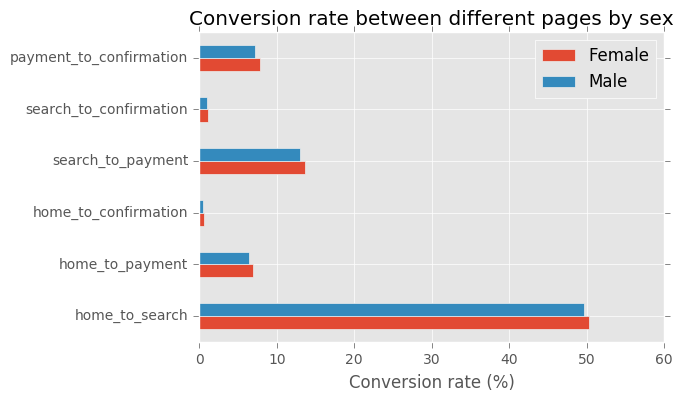

In [20]:
grouped_sex_users = merged_users.groupby('sex')
df_rate_sex = compute_conversion_rate(grouped_sex_users, labels, cols = ['Female', 'Male'], is_single = False)
print df_rate_sex
xlabel = 'Conversion rate (%)'
title = 'Conversion rate between different pages by sex'
plot_conversion_rate(df_rate_sex, xlabel, title)

#### Summary for conversion rate by sex:
* There is no significant difference for conversion rates between male and female.

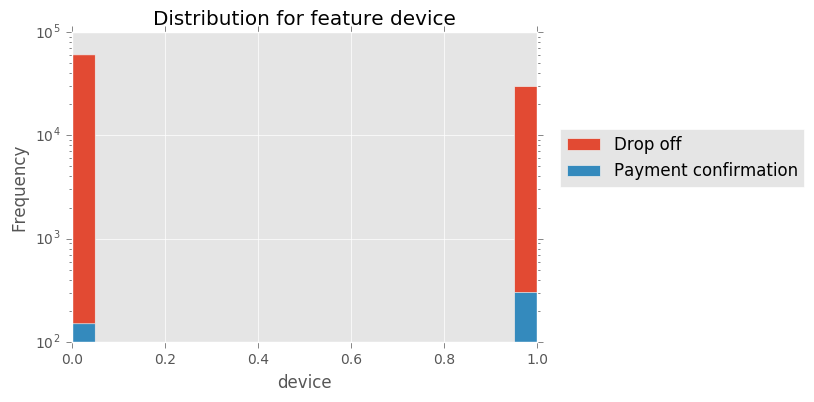

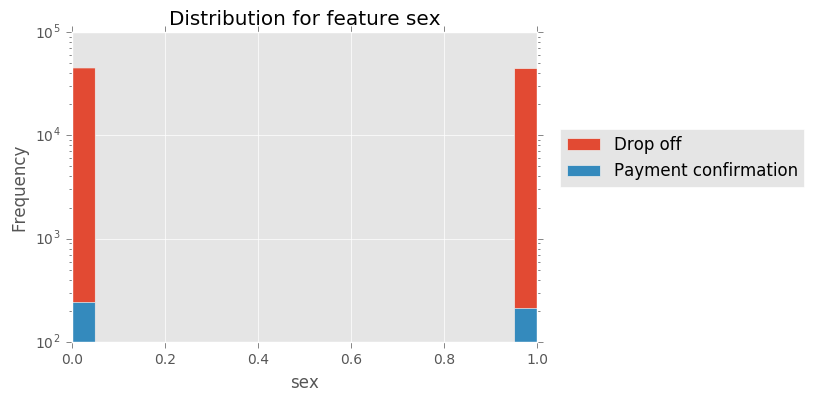

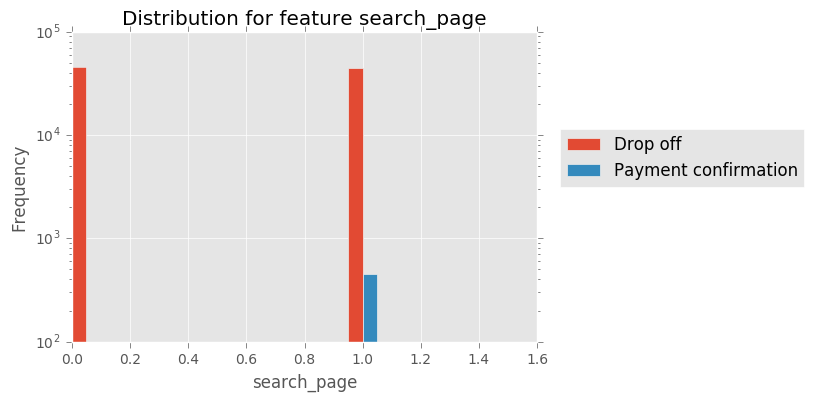

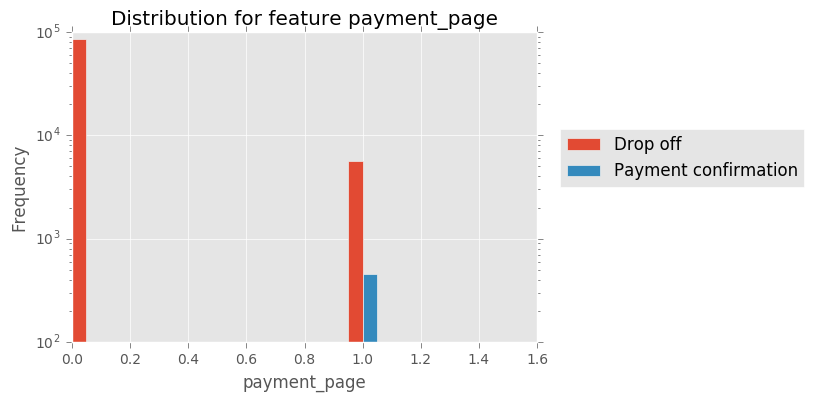

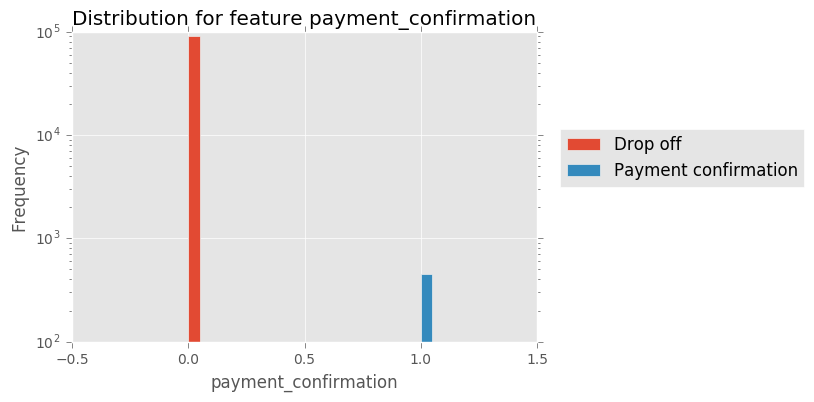

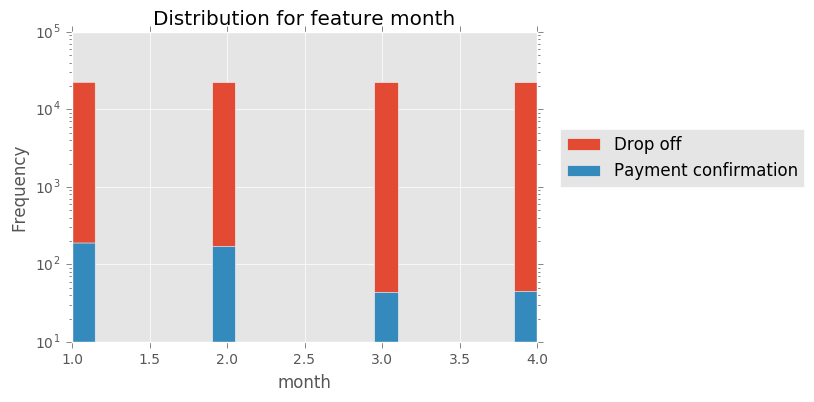

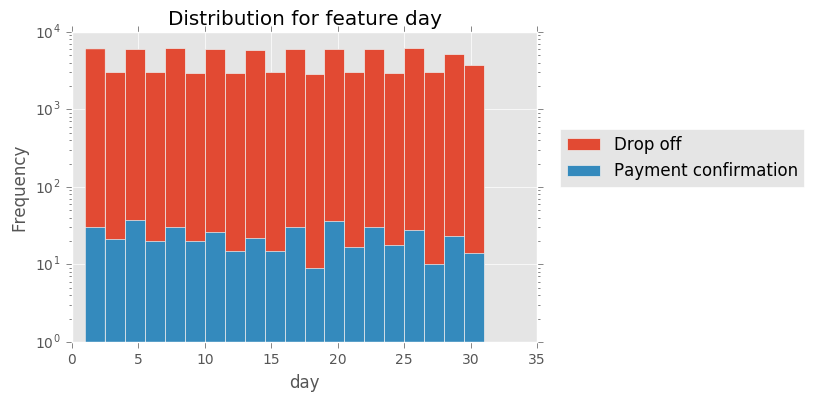

In [21]:
# first to explore the distribution of each features
def feature_his(df, cols, is_transform = False):
    '''
    this function is used to examine the distribution of features
    '''
    for col in cols:
        ax,fig = plt.subplots()
        df[df['payment_confirmation'] == 0][col].plot(kind = 'hist', bins = 20, logy = is_transform)   
        df[df['payment_confirmation'] == 1][col].plot(kind = 'hist', bins = 20, logy = is_transform)   
        plt.ylabel("Frequency")
        plt.xlabel(col)
        plt.title('Distribution for feature %s'%col)
        plt.legend(['Drop off', 'Payment confirmation'], bbox_to_anchor=(1.05, 0.5, 0.75, 0),loc=3,
                   borderaxespad=0.)
#dropped_cols = ['user_id', 'date', 'year', 'home_page']
#merged_users.drop(dropped_cols, axis = 1, inplace = True)
selected_cols = ['device', 'sex', 'search_page', 'payment_page', 'payment_confirmation', 'month', 'day']
feature_his(merged_users, selected_cols, is_transform = True)

#### Summary for feature distribution:
* Mobile users have higher payment confirmation rate as compared to desktop users.
* Female users have slighly higher payment confirmation rate as compared to male users.
* There are higher payment confirmation rate on Jan and Feb as compared to March and April.
* The payment confirmation rate on different days is varied.

Feature-feature correlation heatmap

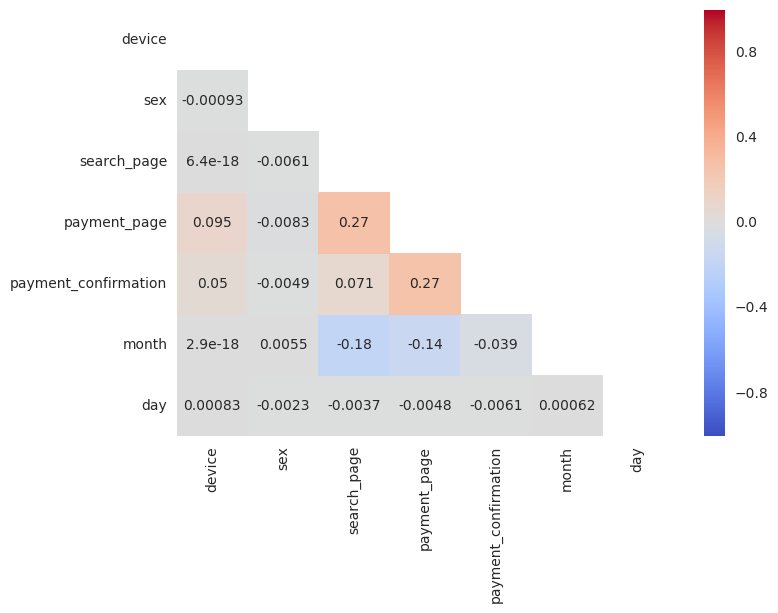

In [22]:
import seaborn as sns
import numpy as np
correlation = merged_users[selected_cols].corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    matplotlib.rcParams.update({'font.size': 10})
    sns.heatmap(correlation, cmap = 'coolwarm', annot = True, mask = mask)

Most festures are not correlated with each other.

<a id='machine_learning'></a>
### 4. Machine Learning Model to Predict User's Dropoff

#### 4.1 Split training and test data set

In [23]:
# import library
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split
import re
# get features
feature_cols = ['device', 'sex', 'search_page', 'payment_page', 'month', 'day']
X = merged_users[feature_cols].values
# get labels
labels =merged_users['payment_confirmation'].values
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20,\
                                                    random_state = 42)
# examine the data shape in train and test data
print 'Train data: ', X_train.shape
print 'Test data: ', X_test.shape

Train data:  (72320, 6)
Test data:  (18080, 6)


#### 4.2 Use ensemble to down sampling and balance classes

In [24]:
from collections import Counter
from imblearn.ensemble import EasyEnsemble

print 'Original dataset shape {}'.format(Counter(y_train))
ee_count = EasyEnsemble (random_state = 42)
X_train_res, y_train_res = ee_count.fit_sample(X_train, y_train)
X_train_res, y_train_res = X_train_res[0], y_train_res[0]
print 'Resampled dataset shape {}'.format(Counter(y_train_res))

/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Original dataset shape Counter({0.0: 71952, 1.0: 368})
Resampled dataset shape Counter({0.0: 368, 1.0: 368})


In [25]:
def plot_learning_curve(title, labels, colors, train_sizes_list, 
                        train_scores_list, test_scores_list, is_two_plots = False):
    '''
    this method plots training and cross-validation learning curves
    '''
    # define a figure layout and labels
    plt.figure(figsize = (10,8))
    plt.title(title)
    plt.xlabel('Training sample size')
    plt.ylabel('Precision Score')
    plt.grid()  
    plt.ylim([0.8, 1.0])
    matplotlib.rcParams.update({'font.size': 20})
    # use length = 2 to plot 4 lines
    length = 2
    # used length = 1 to plot 2 lines
    if is_two_plots:
        length = 1
    for i in range(length):      
        line_label = labels[i]
        line_color = colors[i]
        train_sizes, train_scores, test_scores = train_sizes_list[i], \
                                                 train_scores_list[i], test_scores_list[i]
        # compute the mean score and standard deviation
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        # plot train curve
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color=line_color[0])
        plt.plot(train_sizes, train_scores_mean, 'o-', color=line_color[0],
                 label=line_label[0], linewidth = 5)
        # plot cross-validation curve
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color=line_color[1])
        plt.plot(train_sizes, test_scores_mean, '^--', color=line_color[1],
                 label=line_label[1], linewidth = 5)
        plt.legend(bbox_to_anchor=(0., 1.1, 1., .105),loc=3, mode='expand',
                   borderaxespad=0.)
    return plt

In [26]:
def model_selection(clf, X_train, y_train, title, labels, colors, score, is_two_plots = True):
    '''
    learning and cross-validation curves for different models
    '''
    train_sizes_list = []
    train_scores_list = []
    test_scores_list = []
    cv = ShuffleSplit(n_splits = 5,test_size=0.2, random_state=42)
    train_sizes=np.linspace(.1, 1.0, 10)
    # get data trained with clf
    train_sizes, train_scores, test_scores = learning_curve(
                clf, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring = score)
    train_sizes_list.append(train_sizes)
    train_scores_list.append(train_scores)
    test_scores_list.append(test_scores)
    # generated learning curves to measure the performance of clf
    if is_two_plots:
        print plot_learning_curve(title, labels1, colors, train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = is_two_plots)
    return train_sizes_list, train_scores_list, test_scores_list

#### 4.3 AdaBoosting default model
First, a default AdaBoosting model is trained.

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


([array([ 58, 117, 176, 235, 294, 352, 411, 470, 529, 588])],
 [array([[ 1.        ,  1.        ,  0.98214286,  0.98076923,  1.        ],
         [ 1.        ,  0.99180328,  0.984375  ,  0.99230769,  0.99166667],
         [ 0.97330447,  0.97794499,  0.97670807,  0.99489796,  0.99390244],
         [ 0.96350365,  0.98350808,  0.97381818,  0.97820252,  0.9875146 ],
         [ 0.96745562,  0.96768794,  0.97031011,  0.97651038,  0.98308933],
         [ 0.96683673,  0.96558182,  0.97152542,  0.97035547,  0.96939634],
         [ 0.96582297,  0.97143365,  0.97582785,  0.97031963,  0.97186758],
         [ 0.9688814 ,  0.97253762,  0.97468125,  0.96747967,  0.97357724],
         [ 0.97048095,  0.96874285,  0.97231918,  0.96909091,  0.97272727],
         [ 0.97192365,  0.96945338,  0.97258065,  0.97029703,  0.97394137]])],
 [array([[ 0.96654412,  0.92087912,  0.953663  ,  0.91671253,  0.8916895 ],
         [ 0.9521978 ,  0.97362637,  0.96875   ,  0.93053252,  0.96167312],
         [ 0.97590361, 

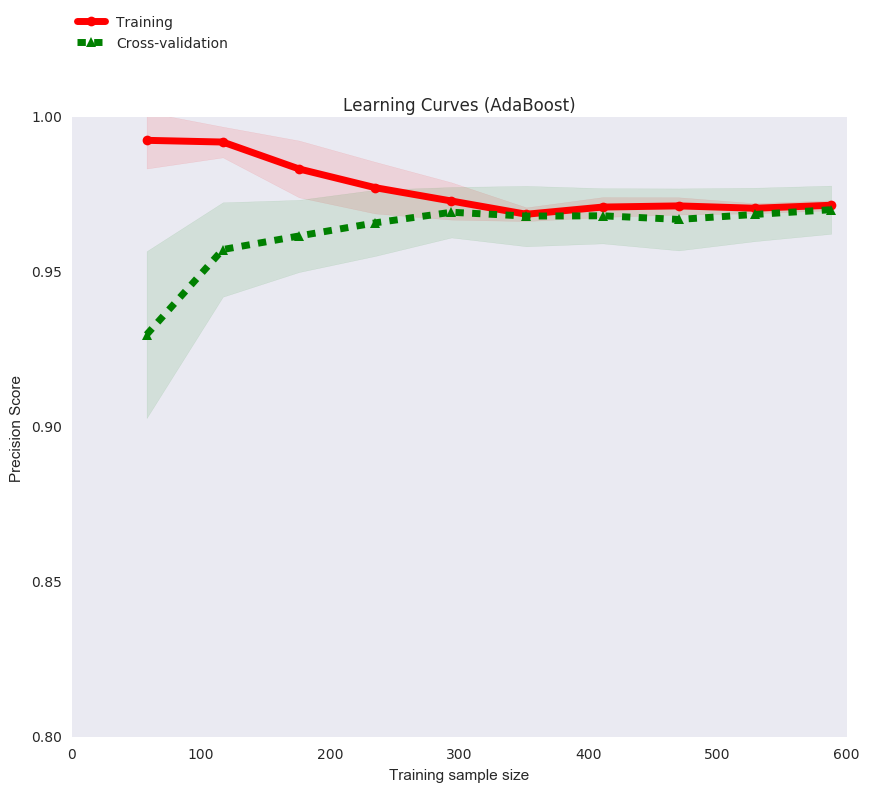

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import learning_curve

# set up a AdaBoostClassifier classifier
ada_clf = AdaBoostClassifier(random_state=42)
title = 'Learning Curves (AdaBoost)'
# set colors: r -red, g- green, b - blue, m - magenta
colors = [('r', 'g')] 
labels1 = [('Training', 'Cross-validation')]
score = 'precision_macro'
# curves for AdaBoostClassifier
model_selection(ada_clf, X_train_res, y_train_res, title, labels1, colors, score)

The model showed good performance and the variance between training and validation decreased as training example size increased. Then, the model is optimized with different parameters

#### 4.4 AdaBoost optimization

In [28]:
from sklearn.model_selection import GridSearchCV
def search_best_params(X, y, clf, params):
    '''
    this method searchs the best parameters for a classifier
    '''
    model = GridSearchCV(clf, params, cv = 5, n_jobs =1, scoring = 'precision_macro')
    model.fit(X, y)
    best_parameter = model.best_params_
    return best_parameter

In [29]:
# setup AdaBoost classifiers
ada_clf = AdaBoostClassifier(random_state=42)
# setup parameters for searching
ada_parameters = {'n_estimators' : [10, 50, 100, 200],
                     'learning_rate' : np.logspace(-4, 1, 5)} 

# search best parameters
ada_best_params = search_best_params(X_train_res, y_train_res,ada_clf,
                                      ada_parameters)
print 'Best parameters for (AdaBoost): ', ada_best_params

/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters for (AdaBoost):  {'n_estimators': 10, 'learning_rate': 0.0001}


<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


([array([ 58, 117, 176, 235, 294, 352, 411, 470, 529, 588])],
 [array([[ 0.96052632,  0.95454545,  0.96551724,  0.96296296,  0.95454545],
         [ 0.96969697,  0.96875   ,  0.96610169,  0.97321429,  0.97540984],
         [ 0.96601942,  0.96938776,  0.96590909,  0.9702381 ,  0.97029703],
         [ 0.96350365,  0.97328244,  0.96551724,  0.97008547,  0.9738806 ],
         [ 0.96745562,  0.96273292,  0.97096774,  0.97452229,  0.9778481 ],
         [ 0.96683673,  0.96067416,  0.96978022,  0.97105263,  0.97368421],
         [ 0.96444444,  0.96527778,  0.97453704,  0.97031963,  0.97018349],
         [ 0.96734694,  0.96694215,  0.97520661,  0.96747967,  0.97165992],
         [ 0.96909091,  0.96909091,  0.97090909,  0.96909091,  0.97272727],
         [ 0.97068404,  0.96945338,  0.97258065,  0.97029703,  0.97394137]])],
 [array([[ 0.97590361,  0.98101266,  0.96875   ,  0.97701149,  0.96385542],
         [ 0.97590361,  0.98101266,  0.96875   ,  0.97701149,  0.96385542],
         [ 0.97590361, 

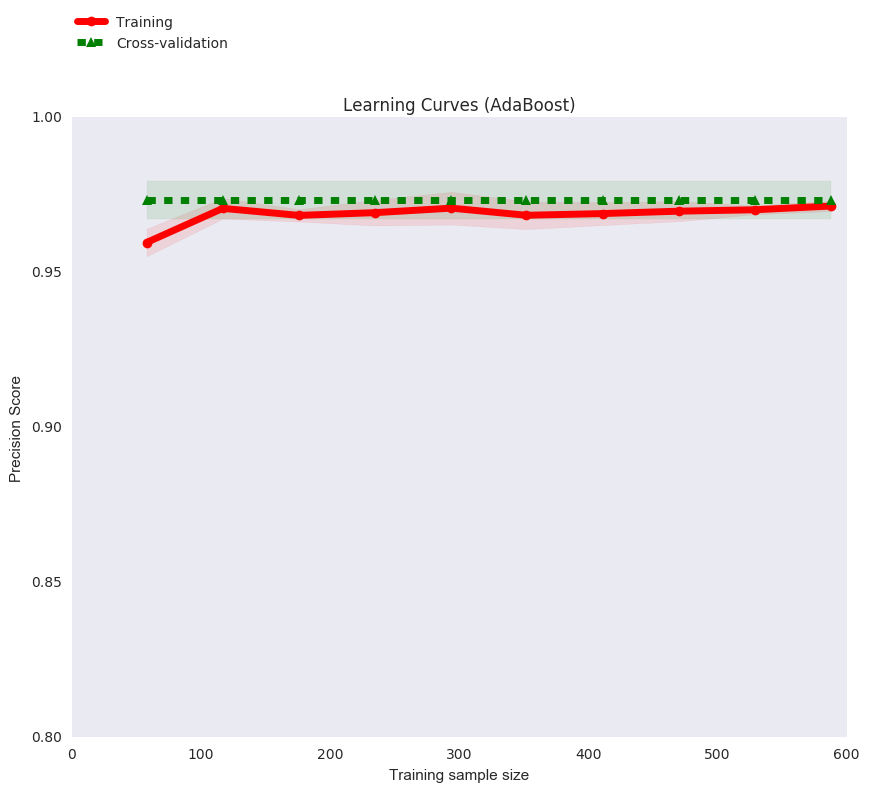

In [30]:
# define the AdaBoost with best parameters
ada_clf_best = AdaBoostClassifier(random_state=42,**ada_best_params)
# set labels for graph
labels2 = [
          ('Training (opt params)', 
           'Cross-validation (opt params)')]
# learning and cross-validation curves for optimized AdaBoost
model_selection(ada_clf_best, X_train_res, y_train_res, title, labels2, colors, score)

#### 4.5 AdaBoost default and optimization comparisons

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


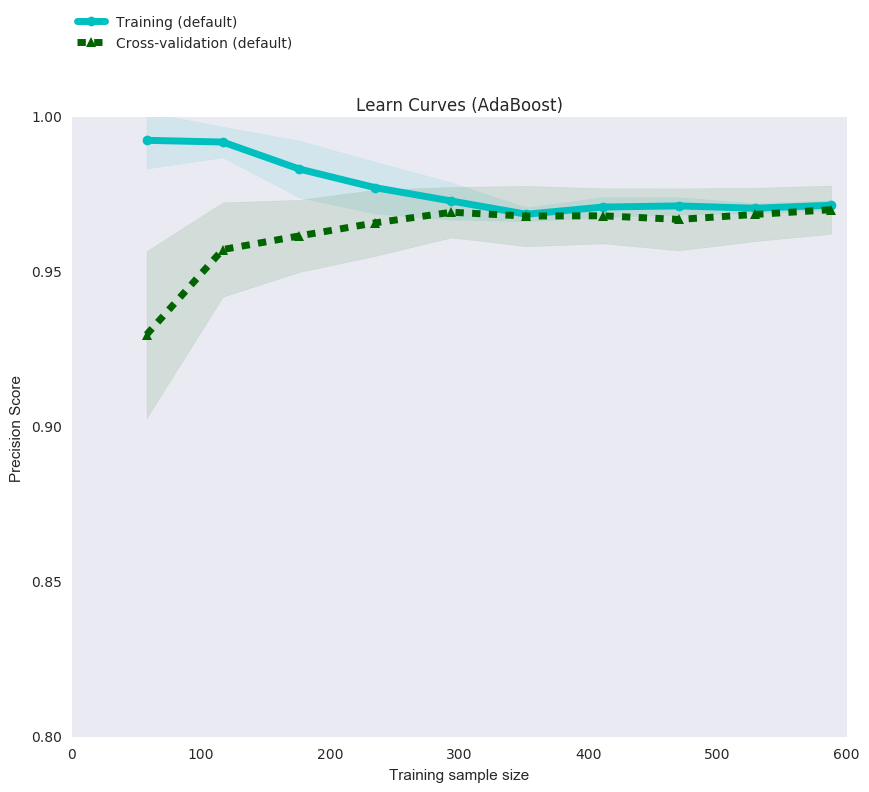

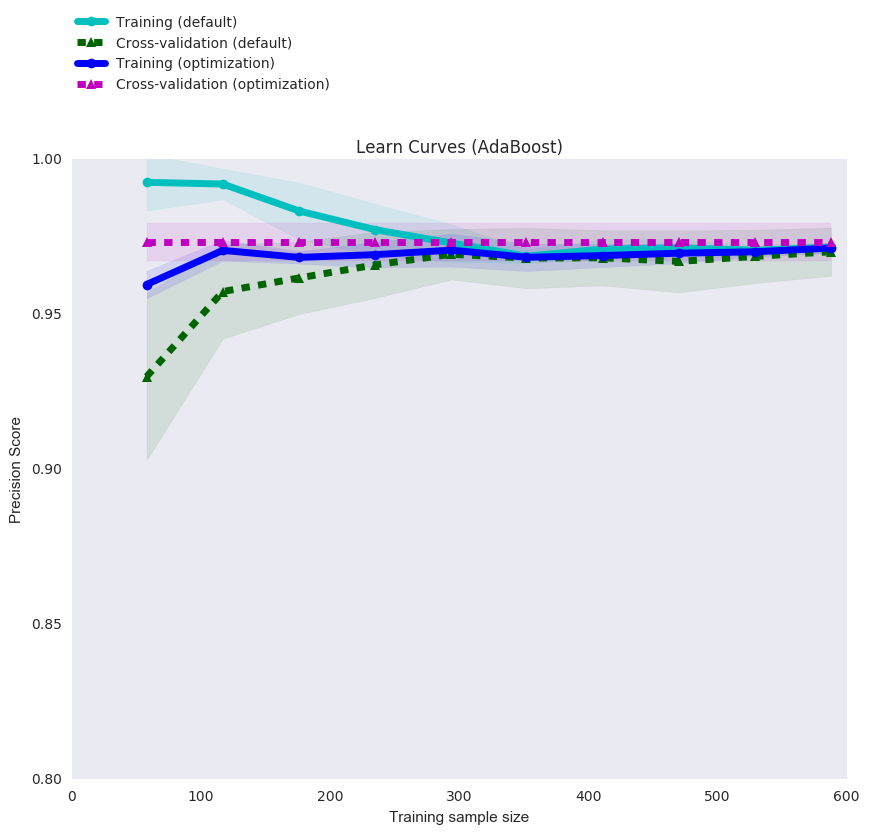

In [31]:
title = 'Learn Curves (AdaBoost)'
labels3 = [('Training (default)', 
           'Cross-validation (default)')]
labels4 = labels3 + [('Training (optimization)', 
           'Cross-validation (optimization)')]

# Learning curves with default parameters
train_sizes_list, train_scores_list, test_scores_list = model_selection(ada_clf, X_train_res, y_train_res, 
                                                        title, labels2, colors, score, is_two_plots = False)
print plot_learning_curve(title, labels3, [('c','darkgreen')], train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = True)
# Learning curves with default or optimizated parameters
train_sizes_list_1, train_scores_list_1, test_scores_list_1 = model_selection(ada_clf_best, X_train_res, y_train_res, 
                                                            title, labels2, colors, score, is_two_plots = False)
train_sizes_list += train_sizes_list_1
train_scores_list += train_scores_list_1
test_scores_list  += test_scores_list_1
print plot_learning_curve(title, labels4, [('c','darkgreen'), ['b', 'm']], train_sizes_list, train_scores_list, 
                          test_scores_list)

The performance of the optimized AdaBoost model is improved as compared the cross-validation curves.

#### 4.6 Final comparisons based on test data set

In [32]:
def model_compare(models, X_train, y_train, X_test):
    '''
    function to compare different models based on test dataset
    '''
    times = []
    preds = []
    for model in models:
        t1 = time.time()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        t2 = time.time()
        times.append(t2 - t1)
        preds.append(pred)
    return times, preds

                      accu_score  precision  recall_score      time
AdaBoost \n(default)   93.384956   53.28125     96.677039  0.352689
AdaBoost \n(opt)       93.384956   53.28125     96.677039  0.065988


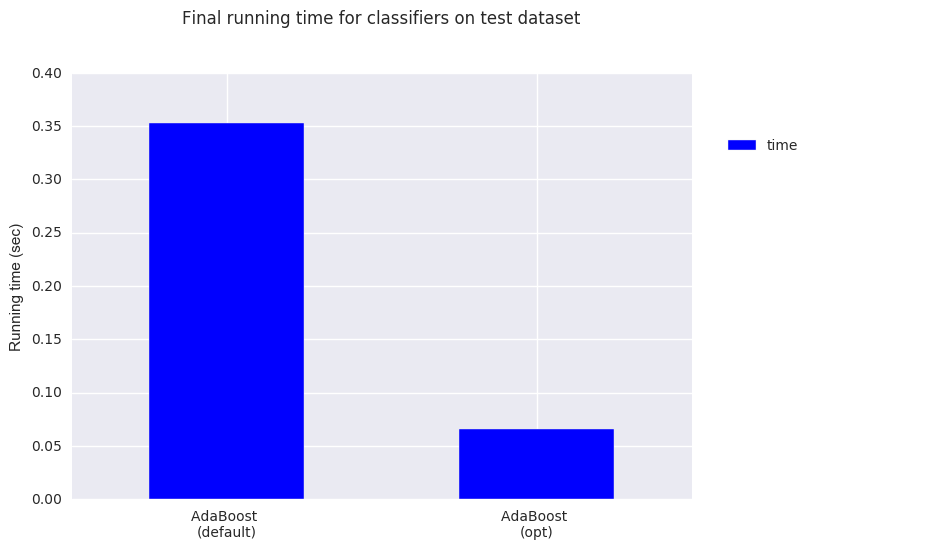

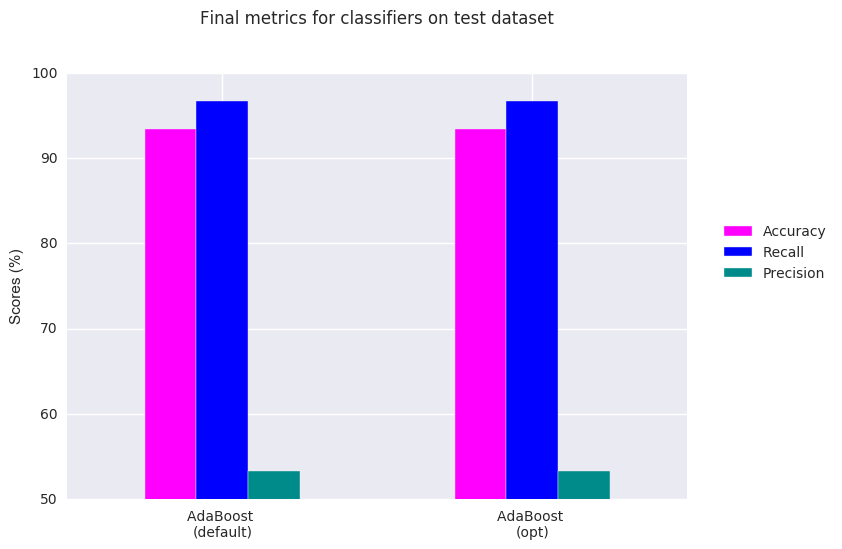

In [33]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
import time

# set up AdaBoost classifiers
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf_best = AdaBoostClassifier(random_state=42,**ada_best_params)

models = [ada_clf, ada_clf_best]

times, preds = model_compare(models, X_train_res, y_train_res, X_test)

# print out final comparison results
models_names = ['AdaBoost \n(default)', 
        'AdaBoost \n(opt)']
# compute metrics
accuracy_scores = [accuracy_score(y_test, pred)*100 for pred in preds]
recall_scores = [recall_score(y_test, pred, average = 'macro')*100 for pred in preds]
precision_scores = [precision_score(y_test, pred, average = 'macro')*100 for pred in preds]
f1_scores = [f1_score(y_test, pred)*100 for pred in preds]
# put data into pandas dataframe
df = pd.DataFrame({'time':times, 'accu_score': accuracy_scores, 'recall_score': recall_scores, 
                   'precision': precision_scores})
df.index = models_names
# print the data
print df
# plot the time graph
plt.Figure(figsize = (15,8))
df[['time']].plot(kind = 'bar', color = ['b'], rot = 0)
plt.legend(['time'], bbox_to_anchor=(1.05, .8, 0.35, 0),loc=3, mode="expand",
                   borderaxespad=0.)
plt.ylabel('Running time (sec)')
plt.title('Final running time for classifiers on test dataset', y = 1.1)
# plot the final metrics graph
plt.Figure(figsize = (15,8))
df_1 = df[['accu_score', 'recall_score', 'precision']]
df_1.plot(kind = 'bar', color = ['magenta', 'blue', 'darkcyan'], rot = 0)
plt.ylim([50, 100])
plt.legend(['Accuracy', 'Recall', 'Precision'], bbox_to_anchor=(1.05, 0.5, 0.75, 0),loc=3,
                   borderaxespad=0.)
#plt.axhline(y = 96., color = 'red', linestyle='dashed', linewidth=2)
plt.ylabel('Scores (%)')
plt.title('Final metrics for classifiers on test dataset', y = 1.1)

Actually, the default and the optimized models have the same performance based on test dataset.

Confusion matrix, without normalization
[[16800  1196]
 [    0    84]]
Normalized confusion matrix
[[ 0.94  0.07]
 [ 0.    1.  ]]


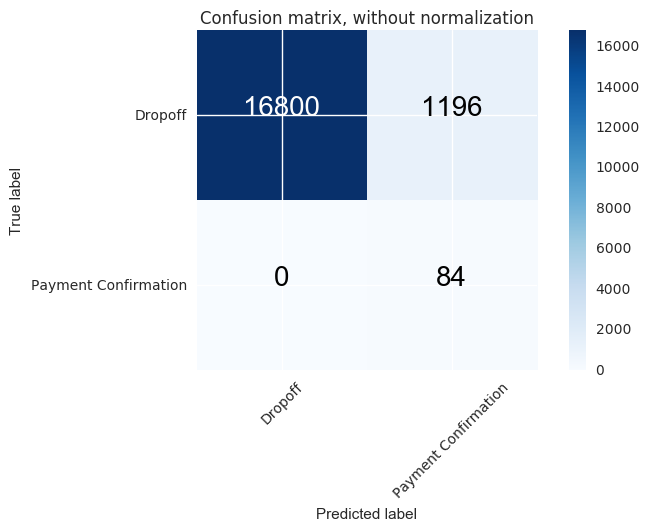

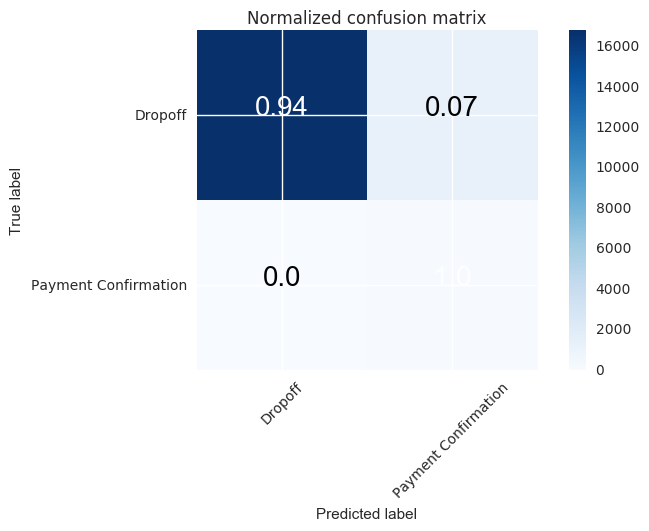

             precision    recall  f1-score   support

        0.0       1.00      0.93      0.97     17996
        1.0       0.07      1.00      0.12        84

avg / total       1.00      0.93      0.96     18080



In [34]:
from sklearn.metrics import confusion_matrix
import itertools
import math
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        for i in range(2):
            cm[i] = [math.ceil(j*100)/100 for j in cm[i]]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, preds[1])
np.set_printoptions(precision=2)
class_names = ['Dropoff', 'Payment Confirmation']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print classification_report(y_test, preds[1])

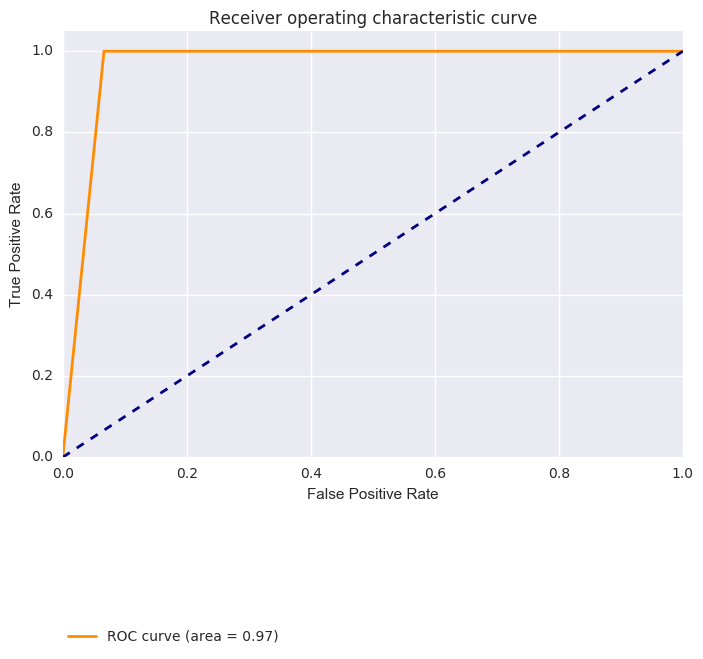

In [35]:
from sklearn.metrics import roc_curve, auc
lr_clf_best = AdaBoostClassifier(random_state=42,**ada_best_params)

y_score = lr_clf_best.fit(X_train, y_train)\
                                .decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(bbox_to_anchor=(0, -.45, 0.75, 0),loc=3,
                   borderaxespad=0.)
plt.show()

Based on the confusion matrix and ROC, the model has very high recall scores and precision to label dropoff. But low precision to label payment confirmation.

<a id='feature_analysis'></a>
### 5. Feature Importance Analysis
Finally, the features that are used to train the AdaBoostClassifier model is analyzed.

In [36]:
weights = ada_clf_best.feature_importances_
xlabels = feature_cols
print 'Features\t', 'Weights'
for (w, l) in zip(weights, xlabels):
    print l, '%.2f'%w

Features	Weights
device 0.00
sex 0.00
search_page 0.00
payment_page 1.00
month 0.00
day 0.00


The payment page visiting is identified as the most important features by the algorithm, which make sense as most of the users dropped off before handing onto the payment page.

<a id='summary'></a>
### 6. Summary and Insight
* The conversion rate decreases from home to search, to payment and to confirmation.
* The conversion rate decreases from search to payment and to confirmation.
* The conversion rates from payment page to payment confirmation page in different months are similar.
* There are higher conversion rates in Jan and Feb from home to search, to payment, to confirmation and from search to payment or to confirmation as compared to those conversion rates on March and April.
* The conversion rates from home page to search page, to payment page and from search to payment page decreased at the end of month.
* Usually, the conversion rates are high at the beginning of the month.
* The conversion rate from home page to search page is the same for desktop and mobile.
* Other conversion rates are higher for mobile users as compared to desktop users.
* There is no significant difference for conversion rates between male and female.
* Mobile users have higher payment confirmation rate as compared to desktop users.
* Female users have slighly higher payment confirmation rate as compared to male users.
* There are higher payment confirmation rate on Jan and Feb as compared to March and April.
* The payment confirmation rate on different days is varied.
* The payment page visiting is identified as the most important features by the algorithm.